In [1]:
%load_ext autoreload

%autoreload 1

%aimport caproj.data
%aimport caproj.logger

import sys
from unittest import mock
import logging

import numpy as np
import pandas as pd

# import caproj

# import logging
# import caproj.logger

# from caproj.data.base import BaseData
# from caproj.visualizations import plot_barplot

import matplotlib.pyplot as plt

In [2]:
caproj.logger.start_logging(default_path='../logging.json')

INFO: caproj.logger: logging configured using ../logging.json


In [3]:
file_path = '../data/raw/Capital_Projects.csv'

In [4]:
Base = caproj.data.BaseData.from_file(filename=file_path, copy_input=True)
# Base.log_record_count()

INFO: caproj.data.base: Run function from_file
INFO: caproj.data.base: Invoke BaseData class and read csv into pandas.DataFrame
INFO: caproj.data.base: Run with args: (<class 'caproj.data.base.BaseData'>,), and kwargs: {'filename': '../data/raw/Capital_Projects.csv', 'copy_input': True}
INFO: BaseData: Number of project change records: 2259
INFO: BaseData: Number of unique projects in dataset: 378


In [10]:
Base.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Reported As Of      2259 non-null   object 
 1   PID                      2259 non-null   int64  
 2   Project Name             2259 non-null   object 
 3   Description              2150 non-null   object 
 4   Category                 2259 non-null   object 
 5   Borough                  1634 non-null   object 
 6   Managing Agency          2259 non-null   object 
 7   Client Agency            1644 non-null   object 
 8   Current Phase            2154 non-null   object 
 9   Design Start             2095 non-null   object 
 10  Budget Forecast          2153 non-null   float64
 11  Latest Budget Changes    1881 non-null   float64
 12  Total Budget Changes     2194 non-null   float64
 13  Forecast Completion      2137 non-null   object 
 14  Latest Schedule Changes 

In [6]:
Base.log_record_count()

INFO    : BaseData: Number of project change records: 2259
INFO    : BaseData: Number of unique projects in dataset: 378


In [7]:
Base.lint_colnames()

INFO    : caproj.data.base: Run function lint_colnames
INFO    : caproj.data.base: Normalize column name format using underscore ('_') as a separator
INFO    : caproj.data.base: Run with args: (<caproj.data.base.BaseData object at 0x7efe4c1d8410>,), and kwargs: {}
INFO    : BaseData: Column names changed (original, new): [('Date Reported As Of', 'Date_Reported_As_Of'), ('Project Name', 'Project_Name'), ('Managing Agency', 'Managing_Agency'), ('Client Agency', 'Client_Agency'), ('Current Phase', 'Current_Phase'), ('Design Start', 'Design_Start'), ('Budget Forecast', 'Budget_Forecast'), ('Latest Budget Changes', 'Latest_Budget_Changes'), ('Total Budget Changes', 'Total_Budget_Changes'), ('Forecast Completion', 'Forecast_Completion'), ('Latest Schedule Changes', 'Latest_Schedule_Changes'), ('Total Schedule Changes', 'Total_Schedule_Changes')]


In [13]:
map_dict = {'Latest_Schedule_Changes': 'Latest_Schedule_Changes'.upper()}

In [14]:
map_dict

{'Latest_Schedule_Changes': 'LATEST_SCHEDULE_CHANGES'}

In [15]:
Base.rename_columns(map_dict=map_dict)

INFO    : caproj.data.base: Run function rename_columns
INFO    : caproj.data.base: Map existing column names to new names based on input dictionary
INFO    : caproj.data.base: Run with args: (<caproj.data.base.BaseData object at 0x7ff138fbb690>,), and kwargs: {'map_dict': {'Latest_Schedule_Changes': 'LATEST_SCHEDULE_CHANGES'}}
INFO    : BaseData       : Column names mapped using direct map_dict input option


In [16]:
map_dict = False
json_path = 1

In [17]:
def test_dict_cond(map_dict, json_path):
    if map_dict:
        logging.info('Column names mapped using direct map_dict input option')
    elif json_path:
        map_dict = False
        if map_dict:
            logging.info('Column names mapped using {}'.format(map_dict))
        else:
            logging.info('JSON failed to load map_dict, no column names changed')
            return
    else:
        logging.warning('cheese')
        return

    print('end')

In [18]:
obj = test_dict_cond(map_dict, json_path)

INFO    : root           : JSON failed to load map_dict, no column names changed


In [19]:
Base = BaseData(pd.DataFrame(columns=['PID']), copy_input=False)

INFO    : BaseData       : Number of project change records: 0
INFO    : BaseData       : Number of unique projects in dataset: 0


In [65]:
pd.to_timedelta(pd.to_datetime('2000-10-01') - pd.to_datetime('2000-10-19') )

Timedelta('-18 days +00:00:00')

In [7]:
type(pd.to_datetime('2000-10-01'))

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
Base = caproj.data.BaseData(
    pd.DataFrame().from_dict({'a': ['5', '3', '2'], 'b': [1, '5.22', 'l'], 'PID': [1, np.nan, "1945-10-05"]}),
    False
)

INFO    : BaseData: Number of project change records: 3
INFO    : BaseData: Number of unique projects in dataset: 2


In [4]:
map_dict = {'a': 'integer', 'b': 'integer', "PID": "datetime"}

In [4]:
map_dict = {'a': 'string'}

In [10]:
series_ignore = Base.df['PID'].copy().astype(str)

In [24]:
series_ignore = pd.to_datetime(Base.df['PID'], errors='ignore')

In [21]:
series_coerce = pd.to_datetime(Base.df['PID'].astype(str), errors='coerce')

In [5]:
series_ignore, series_coerce, dict_errors = Base._to_datetime('PID')

In [8]:
True in [False, False, False]

False

In [10]:
print('test') if type('cheese') != list else 'cheese'

test


In [8]:
series_coerce[2] == series_ignore[2]

True

In [12]:
colvalues_dict = {
    "a": [1, 2, 3],
    "b": [1, 2, np.nan],
    "PID": ["test", "test", "test"],
}
id_col = "unique_id"
df = pd.DataFrame().from_dict(colvalues_dict)

In [16]:
df['b'].map(str)

0    1.0
1    2.0
2    nan
Name: b, dtype: object

In [10]:
series_ignore[series_coerce.isnull()]

0      1
1    NaN
Name: PID, dtype: object

In [11]:
dict_errors

{0: 1}

In [17]:
str(np.nan)

'nan'

In [23]:
import math

math.isnan(dict_errors[1])

True

In [22]:
dict_errors[1] == np.nan

False

In [14]:
type(dict_errors[1])

float

In [15]:
1 and 2 in ignore_series.values

True

In [26]:
[type(val) for val in ignore_series.values]

[int, int, pandas._libs.tslibs.timestamps.Timestamp]

In [53]:
series_ignore == series_coerce

0    False
1    False
2     True
Name: PID, dtype: bool

In [38]:
series_ignore[series_coerce.isnull()]

0    1
1    2
Name: PID, dtype: object

In [69]:
pd.to_datetime(Base.df['PID'], errors='coerce').fillna(Base.df['a'])

0   1970-01-01 00:00:00.000000001
1   1970-01-01 00:00:00.000000002
2   1945-10-05 00:00:00.000000000
Name: PID, dtype: datetime64[ns]

In [5]:
Base.set_dtypes(map_dict=map_dict, coerce=False)

INFO    : caproj.data.base: Run function set_dtypes
INFO    : caproj.data.base: Map and convert columns to specified data types
INFO    : caproj.data.base: Run with args: (<caproj.data.base.BaseData object at 0x7fe3e97bfb50>,), and kwargs: {'map_dict': {'a': 'integer', 'b': 'integer', 'PID': 'datetime'}, 'coerce': False}
INFO    : BaseData: Column dtypes mapped using direct map_dict input option
INFO    : BaseData: column 'a' dtype conversion to 'integer' encountered no errors
INFO    : BaseData: column 'b' dtype conversion to 'integer' encountered 2 errors: {1: '5.22', 2: 'l'}
INFO    : BaseData: column 'PID' dtype conversion to 'datetime' encountered 1 errors: {0: 1}


In [8]:
Base.df['PID']

0                      1
1                    NaN
2    1945-10-05 00:00:00
Name: PID, dtype: object

In [9]:
Base.dtype_errors

{'a': {},
 'b': {1: '5.22', 2: 'l'},
 'PID': {0: 1, 1: nan, 2: Timestamp('1945-10-05 00:00:00')}}

In [27]:
np.datetime64 in [type(val) for val in Base.df['PID'].values]

True

In [30]:
hasattr(Base, 'df')

True

In [35]:
'cheese' and 'test' in 'cheese and'

False

In [19]:
type(Base.df['PID'].values[0]) == np.datetime64

True

In [7]:
Base.set_dtypes(json_path='nope', coerce=False)

INFO    : caproj.data.base: Run function set_dtypes
INFO    : caproj.data.base: Map and convert columns to specified data types
INFO    : caproj.data.base: Run with args: (<caproj.data.base.BaseData object at 0x7f6e603f5b50>,), and kwargs: {'json_path': 'nope', 'coerce': False}
INFO    : BaseData: JSON failed to load map_dict, no column dtypes changed


In [69]:
Base.df

,a,b,PID
0,5,1,11 days 22:27:01.312332
1,3,5.22,0 days 00:00:00.000000
2,2,l,0 days 00:00:00.000000


In [71]:
'cheese wiz'.capitalize()

'Cheese wiz'

In [8]:
len(Base.dtype_errors['a'])

0

In [25]:
Base.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       3 non-null      float64
 1   b       3 non-null      float64
 2   PID     3 non-null      uint8  
dtypes: float64(2), uint8(1)
memory usage: 179.0 bytes


In [26]:
ser1 = pd.to_numeric(Base.df.a, downcast='unsigned', errors='ignore')
ser1

0    5.22
1    3.00
2    2.00
Name: a, dtype: float64

In [27]:
ser2 = pd.to_numeric(Base.df.a, downcast='unsigned', errors='coerce')
ser2

0    5.22
1    3.00
2    2.00
Name: a, dtype: float64

In [28]:
error_dict = dict()

In [29]:
error_dict['cheese'] = ser1[ser1 != ser2].to_dict()

In [30]:
error_dict

{'cheese': {}}

In [31]:
Base.df.columns

Index(['a', 'b', 'PID'], dtype='object')

In [32]:
[col.lower().replace(' ', '_').replace('-', '_') for col in Base.df.columns]

['a', 'b', 'pid']

In [33]:
Base.

SyntaxError: invalid syntax (<ipython-input-33-89b9c4dffe2b>, line 1)

In [34]:
cat_values = Base.df['Category'].value_counts()

plot_barplot(cat_values, 'test')

KeyError: 'Category'

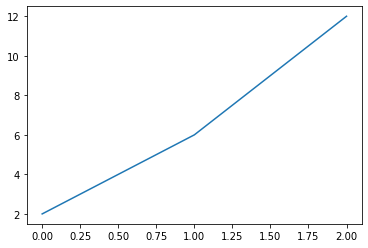

In [11]:
fig = plt.figure()
plt.plot([0,1,2], [2,6,12])

In [45]:
(data['Date Reported As Of'].astype(str) + data['PID'].astype(str)).value_counts()

06/01/2016 12:00:00 AM516    1
05/01/2019 12:00:00 AM96     1
05/01/2019 12:00:00 AM561    1
01/01/2016 12:00:00 AM18     1
06/01/2016 12:00:00 AM360    1
                            ..
09/01/2019 12:00:00 AM91     1
04/01/2017 12:00:00 AM475    1
03/01/2018 12:00:00 AM617    1
09/01/2017 12:00:00 AM664    1
09/01/2019 12:00:00 AM867    1
Length: 2259, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Reported As Of      2259 non-null   object 
 1   PID                      2259 non-null   int64  
 2   Project Name             2259 non-null   object 
 3   Description              2150 non-null   object 
 4   Category                 2259 non-null   object 
 5   Borough                  1634 non-null   object 
 6   Managing Agency          2259 non-null   object 
 7   Client Agency            1644 non-null   object 
 8   Current Phase            2154 non-null   object 
 9   Design Start             2095 non-null   object 
 10  Budget Forecast          2153 non-null   float64
 11  Latest Budget Changes    1881 non-null   float64
 12  Total Budget Changes     2194 non-null   float64
 13  Forecast Completion      2137 non-null   object 
 14  Latest Schedule Changes 

In [47]:
def ensure_datetime_and_sort(df):
    """Ensures datetime columns are formatted correctly and changes are sorted
    
    :param df: pd.DataFrame of the cleaned capital projects change records data
    
    :return: Original pd.DataFrame with datetime columns formatted and records
             sorted
    """
    datetime_cols = [
        'Date Reported As Of',
        'Design Start',
        'Forecast Completion'
    ]

    for col in datetime_cols:
        df[col] = pd.to_datetime(df[col])
    
    return df

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Reported As Of      2259 non-null   object 
 1   PID                      2259 non-null   int64  
 2   Project Name             2259 non-null   object 
 3   Description              2150 non-null   object 
 4   Category                 2259 non-null   object 
 5   Borough                  1634 non-null   object 
 6   Managing Agency          2259 non-null   object 
 7   Client Agency            1644 non-null   object 
 8   Current Phase            2154 non-null   object 
 9   Design Start             2095 non-null   object 
 10  Budget Forecast          2153 non-null   float64
 11  Latest Budget Changes    1881 non-null   float64
 12  Total Budget Changes     2194 non-null   float64
 13  Forecast Completion      2137 non-null   object 
 14  Latest Schedule Changes 

In [49]:
data = ensure_datetime_and_sort(data)

In [50]:
old_cols = list(data.columns)
new_cols = [col.replace(' ', '_') for col in old_cols]
data.columns = new_cols

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date_Reported_As_Of      2259 non-null   datetime64[ns]
 1   PID                      2259 non-null   int64         
 2   Project_Name             2259 non-null   object        
 3   Description              2150 non-null   object        
 4   Category                 2259 non-null   object        
 5   Borough                  1634 non-null   object        
 6   Managing_Agency          2259 non-null   object        
 7   Client_Agency            1644 non-null   object        
 8   Current_Phase            2154 non-null   object        
 9   Design_Start             2095 non-null   datetime64[ns]
 10  Budget_Forecast          2153 non-null   float64       
 11  Latest_Budget_Changes    1881 non-null   float64       
 12  Total_Budget_Changes     2194 non-

In [ ]:
# Use 'underscores' in column headers instead of spaces
old_cols = list(data.columns)
new_cols = [s.replace(' ', '_') for s in old_cols]
rename_dict = {k:v for k,v in zip(old_cols, new_cols)}
data.rename(columns=rename_dict, inplace=True)